The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



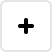
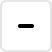
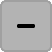
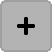
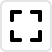
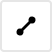
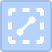
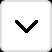
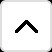
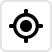
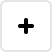
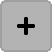
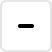
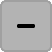
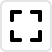
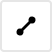
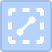
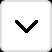
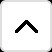
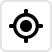

In [1]:
import math
import random
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

In [2]:
def dump_plot(plot, display=None):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True
    
    if display:
        print(plot_json)

    return plot


# Scatter plot

In [3]:
n = 450
x_range = np.arange(-2 * math.pi, 2 * math.pi, 4 * math.pi / n)
y_range = np.sin(x_range) + np.array([random.uniform(-.5, .5) for i in range(n)])
df = pd.DataFrame({ 'x' : x_range, 'y' : y_range })

ggplot(df, aes(x='x', y='y')) \
    + geom_point(shape=21, fill='yellow', color='#8c564b') \
    + geom_smooth(method='loess', span=.2, size=1.5, color='#9467bd')

# Map plot

In [4]:
world = geocode_countries().get_boundaries()
north_america = geocode_countries(['usa', 'canada', 'mexico']).get_boundaries()
australia = geocode_countries('australia').get_boundaries(3)

world_map = ggplot() \
    + geom_map(aes(fill='country'), map=world, size=0.1, show_legend=False, tooltips=layer_tooltips().line("@country"))

north_america_map = ggplot() \
    + geom_map(aes(fill='country'), map=north_america, size=0.1, show_legend=False,
              tooltips=layer_tooltips().line("@country")) \
    + coord_map(xlim=[-180, -50])

australia_map = ggplot() \
    + geom_map(aes(fill='country'), map=australia, size=0.1, show_legend=False,
              tooltips=layer_tooltips().line("@country")) \
    + coord_map(xlim=[110, None], ylim=[-45, None])

In [5]:
ggplot() + geom_map(aes(fill='country'), map=world, size=0.1, show_legend=False) + coord_map() + ggsize(1000, 800)

# Transform

In [6]:
np.random.seed(42)
x = np.random.poisson(size=100)

ggplot({'x': x}, aes(x='x')) + geom_histogram() + scale_y_log2()

# Bar plot

In [7]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')

In [8]:
annotation = (layer_labels()
               # .line('@drv')
                .line('@..count..')
                .line('@..proppct..')
                .format('..proppct..', '{d}%'))

ggplot(mpg_df, aes('class', fill='drv')) \
    + geom_bar(labels=annotation, tooltips='none') \
    + theme(legend_position='none')

# Facets

Shared axis doesn't work with panning

In [9]:
plot_data = pd.DataFrame.from_records([
    ("pet", "cat", 5),
    ("pet", "dog", 10),
    ("pet", "rabbit", 2),
    ("pet", "hamster", 1),

    ("farm_animal", "cow", 500),
    ("farm_animal", "pig", 100),
    ("farm_animal", "horse", 700),
])
plot_data.columns = ("animal_type", "animal", "weight")

plot = (
    ggplot(plot_data, aes(x="animal", y="weight"))
    + facet_grid(y="animal_type", scales="free_y")
    + geom_bar(stat="identity", size=0.5, color="black")
    + theme_bw()
    + theme(
        panel_grid_minor=element_blank()
    )
)
plot + ggtitle('Panning renders the ticks useless')

# Grids

In [10]:
gggrid([
    world_map,
    gggrid([
    north_america_map,
    australia_map
    ])
], ncol=1)

# Bunch

In [11]:
bunch = GGBunch()
bunch.add_plot(world_map, 0, 0, 800, 400)
bunch.add_plot(north_america_map, 0, 400, 400, 300)
bunch.add_plot(australia_map, 400, 400, 300, 300)
bunch.show()

# Marginal layers

Not yet supported

In [12]:
np.random.seed(0)

cov0=[[1, -.8],
     [-.8, 1]]
cov1=[[ 10, .1],
       [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=200).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=200).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*200 + ["B"]*200
)

p = ggplot(data, aes("x", "y", color="c", fill="c")) + geom_point()
p + ggmarginal("tr", layer=geom_density(alpha=0.3, show_legend=False))

# livemap

## Tooltips precision test (no hitbox simplification, tooltip must appear exactly at borders)

In [13]:
x1 = [0, 0, 40, 40, 0]
y1 = [0, 40, 40, 0, 0]
g1 = ['a'] * len(x1)

x2 = [it + 60 for it in x1]
y2 = y1
g2 = ['b'] * len(x2)

poly = {
    'x': x1 + x2,
    'y': y1 + y2,
    'g': g1 + g2,
}

ggplot() \
    + geom_livemap() \
    + geom_polygon(aes(x='x', y='y', fill='g'), data=poly, tooltips=layer_tooltips().line("^fill"))

In [14]:
ggplot() + geom_livemap() + geom_polygon(aes(fill='country'), size=0, map=world, show_legend=False)

In [15]:
gggrid([
    ggplot() + geom_livemap() + geom_polygon(aes(fill='country'), size=0, map=world, show_legend=False, tooltips=layer_tooltips().line("^fill")),
    ggplot() + geom_livemap() + geom_polygon(aes(fill='country'), size=0, map=north_america, show_legend=False, tooltips=layer_tooltips().line("^fill")),
])

# Performance

In [16]:
np.random.seed(0)

cov0=[[1, -.8],
     [-.8, 1]]
cov1=[[ 10, .1],
       [.1, .1]]

n = 4000

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=n).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=n).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*n + ["B"]*n
)

p = ggplot(data, aes("x", "y", color="c", fill="c")) + geom_point()
#p + ggmarginal("tr", layer=geom_density(alpha=0.3, show_legend=False))
dump_plot(p)

def plot(n):
    n = int(n / 2)
    np.random.seed(0)
    
    cov0=[[1, -.8],
         [-.8, 1]]
    cov1=[[ 10, .1],
           [.1, .1]]

    
    x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=n).T
    x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=n).T
    
    data = dict(
        x = np.concatenate((x0,x1)),
        y = np.concatenate((y0,y1)),
        c = ["A"]*n + ["B"]*n
    )
    
    return ggplot(data, aes("x", "y", color="c", fill="c")) + geom_point() + ggtitle('n=' + str(n * 2))
    
plot(2000)

In [17]:
plot(100)

In [18]:
plot(1000)

In [19]:
plot(10_000)

# Tooltips

In [20]:
x1 = [0, 0, 40, 40, 0]
y1 = [0, 40, 40, 0, 0]
g1 = ['a'] * len(x1)

x2 = [60, 80, 100, 60]
y2 = [0, 40, 0, 0]
g2 = ['b'] * len(x2)

x3 = [-120, -100, -80, -100, -120]
y3 = [  20,  40,  20,   0,   20]
g3 = ['c'] * len(x3)

poly = {
    'x': x1 + x2,
    'y': y1 + y2,
    'g': g1 + g2,
}

p12 = ggplot() \
    + geom_polygon(
        aes(
            x=x1 + x2, 
            y=y1 + y2, 
            fill=g1 + g2
        ),
        tooltips=layer_tooltips().line("^fill")
    ) \
    + coord_fixed()

p23 = ggplot() \
    + geom_polygon(
        aes(x=x2 + x3, y=y2 + y3, fill=g2 + g3), 
        tooltips=layer_tooltips().line("^fill")
    ) \
    + coord_fixed()

p13 = ggplot() \
    + geom_polygon(
        aes(x=x1 + x3, y=y1 + y3, fill=g1 + g3), 
        tooltips=layer_tooltips().line("^fill")
    ) \
    + coord_fixed()

# livemap
lp12 = ggplot() \
    + geom_livemap() \
    + geom_polygon(
        aes(x=x1 + x2, y=y1 + y2, fill=g1 + g2),
        tooltips=layer_tooltips().line("^fill")
    )

lp23 = ggplot() \
    + geom_livemap() \
    + geom_polygon(
        aes(x=x2 + x3, y=y2 + y3, fill=g2 + g3), 
        tooltips=layer_tooltips().line("^fill")
    )

lp13 = ggplot() \
    + geom_livemap() \
    + geom_polygon(
        aes(x=x1 + x3, y=y1 + y3, fill=g1 + g3), 
        tooltips=layer_tooltips().line("^fill")
    )


In [21]:
p12

In [22]:
p23

### gggrid

In [23]:
gggrid([
    p12,
    gggrid([
        p23, p13
    ])
], ncol=1)

In [24]:
gggrid([
    lp12,
    gggrid([
        lp23, lp13
    ])
], ncol=1)

### GGBunch

In [25]:
bunch = GGBunch()

bunch.add_plot(p12, 0, 0, 600, 400)
bunch.add_plot(p23, 600, 400, 600, 400)
bunch.show()

In [26]:
livemap_bunch = GGBunch()

livemap_bunch.add_plot(lp12, 0, 0, 600, 400)
livemap_bunch.add_plot(lp23, 600, 400, 600, 400)

livemap_bunch.show()

### facet_wrap

In [27]:
p12 + facet_wrap('fill', ncol=2, nrow=1)

In [28]:
lp12 + facet_wrap('fill', ncol=2, nrow=1)

In [29]:
lp12 + ggtitle("Multi\nline\ntitle")